# Parseval's theorem relates $\int x(t)^2 dt$ to $\int |X(2\pi f)|^2 df$

In [1]:
import matplotlib
import numpy as np
from numpy.fft import fft
from aesthetics.plotting import *

import matplotlib.pyplot as plt
%matplotlib inline

## Time domain

Create a pink noise signal

In [133]:
npoints = 100000
x = np.random.randn(npoints) + 1
filt = (1./1000)*np.exp(-np.linspace(-5,1,1000))
signal = np.convolve(x, filt, mode='same')
# signal /= 100
# signal += 5

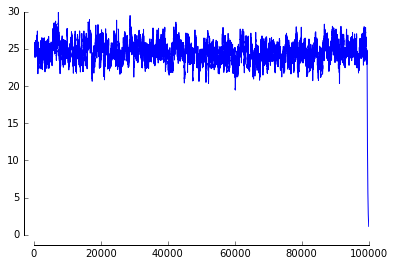

In [134]:
plt.plot(signal)
# plt.xlim([0,100])
adjust_spines(plt.gca())

In [135]:
np.mean(signal)

24.48289149279519

In [136]:
np.var(signal)

3.2742217637614535

## Frequency domain

In [137]:
Signal_f = abs(fft(signal))
X_f = abs(fft(x))

In [138]:
len(X_f)

100000

In [139]:
X_f_normalized = X_f/len(X_f)
Signal_f_normalized = Signal_f/len(Signal_f)

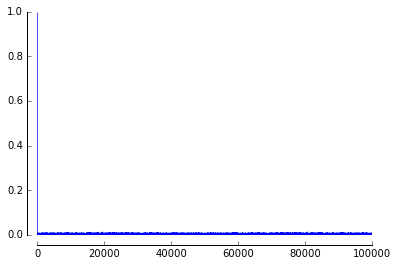

In [140]:
plt.plot(X_f_normalized)
# plt.plot(Signal_f_normalized, 'g')
adjust_spines(plt.gca())

In [141]:
X_f_normalized[0]

0.99361107450318553

In [144]:
print('Error of fft mean is %f' %(abs(Signal_f_normalized[0]-np.mean(signal))))

Error of fft mean is 0.000000


In [145]:
X_f_normalized_one_sided = X_f_normalized[:npoints//2]
Signal_f_normalized_one_sided = Signal_f_normalized[:npoints//2]

In [146]:
len(X_f_normalized_one_sided)

50000

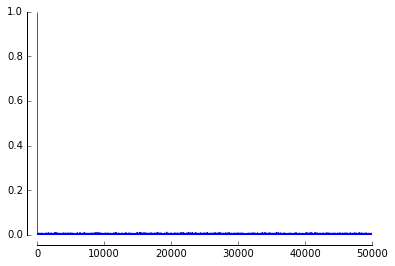

In [147]:
plt.plot(X_f_normalized_one_sided)
adjust_spines(plt.gca())

Naive power spectral density integral

In [148]:
np.sum(Signal_f_normalized_one_sided**2)

601.04908672420265

2x power spectral density excluding mean

In [149]:
2*np.sum(Signal_f_normalized_one_sided[1:]**2)

3.2742217524382777

In [150]:
np.var(signal)

3.2742217637614535

In [151]:
print('Error of fft var is %f' %(abs(2*np.sum(Signal_f_normalized_one_sided[1:]**2)-np.var(signal))))

Error of fft var is 0.000000


The later is the correct way to compute variance from FFT

In [152]:
w = signal
y = np.random.randn(*signal.shape)
z = w*y
print('Mean of z is %f, var of z is %f.' %(np.mean(z), np.var(z)))

Mean of z is -0.091687, var of z is 604.524996.


In [153]:
Y_f = abs(fft(y))
Y_f_normalized = Y_f/len(Y_f)
Y_f_normalized_one_sided = Y_f_normalized[:npoints//2]

In [154]:
2.0*np.sum((Y_f_normalized_one_sided[1:]*X_f_normalized_one_sided[1:])**2)

1.006535288247683e-05

### Computing variance of filtered signal in frequency domain

In [155]:
X_f = abs(fft(x))
X_f_normalized = X_f/len(X_f)
X_f_normalized_one_sided = X_f_normalized[:len(X_f)//2]
Filt_f = abs(fft(filt))
Filt_f_normalized = Filt_f/len(Filt_f)
Filt_f_normalized_one_sided = Filt_f_normalized[:len(Filt_f)//2]

In [156]:
np.var(signal)

3.2742217637614535

In [157]:
from scipy.interpolate import interp1d

In [158]:
filt_one_sided_freqs = np.linspace(0, len(filt)/2, len(Filt_f_normalized_one_sided))
x_one_sided_freqs = np.linspace(0, len(x)/2, len(X_f_normalized_one_sided))

In [159]:
Filt_f_normalized_one_sided_interp = interp1d(filt_one_sided_freqs, Filt_f_normalized_one_sided, kind='slinear',
                                             bounds_error=False, fill_value=[0])
Filt_f_normalized_one_side_interpolated = Filt_f_normalized_one_sided_interp(x_one_sided_freqs)

In [160]:
2.0*np.sum((X_f_normalized_one_sidedx[1:]*Filt_f_normalized_one_sided[1:])**2)

NameError: name 'X_f_normalized_one_sidedx' is not defined

In [161]:
2.0*np.sum((X_f_normalized_one_sided[1:]*Filt_f_normalized_one_side_interpolated[1:])**2)

3.264425153766519e-08

In [162]:
2.0*np.sum(Signal_f_normalized_one_sided[1:]**2)

3.2742217524382777

In [163]:
np.var(x)

0.99615779300367902

In [164]:
2.0*np.sum((X_f_normalized_one_sided[1:])**2)

0.99615773452220668

In [165]:
2.0*np.sum((Filt_f_normalized_one_side_interpolated[1:])**2)

0.0012375076218941888

In [166]:
np.var(filt)

0.0012334510016979174

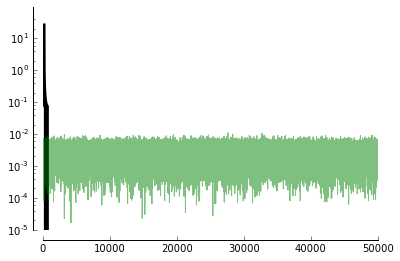

In [111]:
plt.plot(x_one_sided_freqs, Filt_f_normalized_one_side_interpolated, 'k', linewidth=5)
plt.plot(x_one_sided_freqs, X_f_normalized_one_sided, 'g', alpha=0.5)
plt.yscale('log')
adjust_spines(plt.gca())

In [174]:
2.0*(np.sum(X_f_normalized_one_sided[1:]*Filt_f_normalized_one_side_interpolated[1:]))**2

4.6385986525516985e-07

In [176]:
2.0*(np.sum((X_f_normalized_one_sided[1:]*Filt_f_normalized_one_side_interpolated[1:])**2))

3.264425153766519e-08

In [177]:
np.min(X_f_normalized_one_sided)

1.1164912422097175e-05

In [178]:
np.min(Filt_f_normalized_one_side_interpolated)

0.0

In [191]:
blah = np.fft.irfft(Filt_f_normalized_one_side_interpolated*X_f_normalized_one_sided, 2*len(Filt_f_normalized_one_side_interpolated))

In [194]:
len(blah)

100000

In [195]:
np.var(blah)

3.2644251537665186e-18

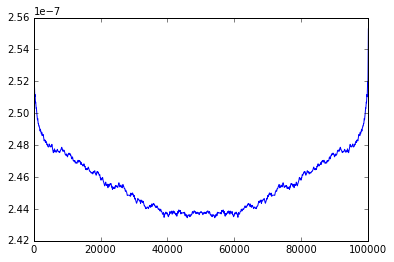

In [193]:
plt.plot(blah)

In [202]:
? np.fft.rfft

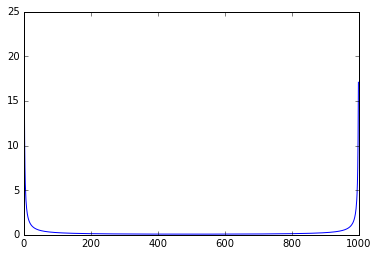

In [201]:
plt.plot(abs(np.fft.fft(filt)))

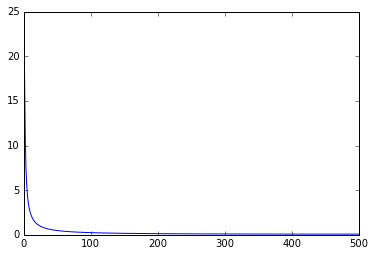

In [205]:
plt.plot(abs(np.fft.rfft(filt)))

In [203]:
len(np.fft.rfft(filt))

501

In [204]:
len(np.fft.fft(filt))

1000

In [196]:
filt_fft = np.fft.fft(filt)
filt_fft_interp = interp1d(filt_one_sided_freqs, Filt_f_normalized_one_sided, kind='slinear',
                                             bounds_error=False, fill_value=[0])
Filt_f_normalized_one_side_interpolated = Filt_f_normalized_one_sided_interp(x_one_sided_freqs)
blop = np.fft.ifft(np.fft.fft(x)*np.fft.fft(filt))

ValueError: operands could not be broadcast together with shapes (100000,) (1000,) 

In [206]:
filt_rfft = np.fft.rfft(filt)
filt_rfft_interp = interp1d(np.linspace(0, len(filt_rfft), len(filt_rfft)), filt_rfft, kind='slinear',
                           bounds_error=False, fill_value=[0])
filt_rfft_interpolated = filt_rfft_interp(np.linspace(0, len(np.fft.rfft(x)), len(np.fft.rfft(x))))

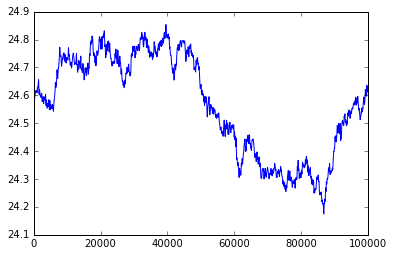

In [207]:
plt.plot(np.fft.irfft(filt_rfft_interpolated*np.fft.rfft(x)))

In [208]:
np.var(np.fft.irfft(filt_rfft_interpolated*np.fft.rfft(x)))

0.032592777976240307

In [209]:
filt_rfft = np.fft.rfft(filt)
filt_rfft_interp = interp1d(np.linspace(0, len(filt_rfft), len(filt_rfft)), filt_rfft, kind='linear',
                           bounds_error=False, fill_value='extrapolate')
filt_rfft_interpolated = filt_rfft_interp(np.linspace(0, len(np.fft.rfft(x)), len(np.fft.rfft(x))))

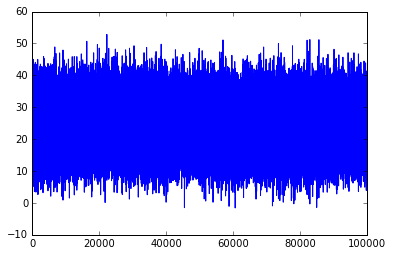

In [210]:
plt.plot(np.fft.irfft(filt_rfft_interpolated*np.fft.rfft(x)))

In [211]:
np.var(np.fft.irfft(filt_rfft_interpolated*np.fft.rfft(x)))

43.250643048020855

In [212]:
np.var(np.convolve(x, filt, 'same'))

3.2742217637614535

## What if we simplify this with two equal length arrays

In [308]:
w = np.random.randn(2*10000,)
y = np.exp(-np.linspace(0,10,2*10000))
z = np.convolve(w,y, 'same')

In [309]:
np.var(z)

251.54224351129696

In [310]:
np.var(w)

0.99343962820010678

In [311]:
np.var(y)

0.040019411134282659

In [326]:
np.mean(w)

-0.0057507410028930514

In [327]:
np.mean(y)

0.10001546345236455

In [328]:
np.mean(z)

-8.3720334170012745

In [312]:
np.fft.rfft(y)[0]

(2000.3092690472909+0j)

In [313]:
np.mean(y)

0.10001546345236455

In [314]:
np.fft.irfft(np.fft.rfft(w)*np.fft.rfft(y)).var()

478.8693923960563

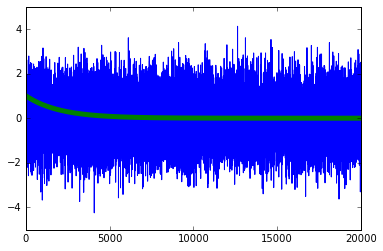

In [315]:
plt.plot(w)
plt.plot(y, linewidth=5)

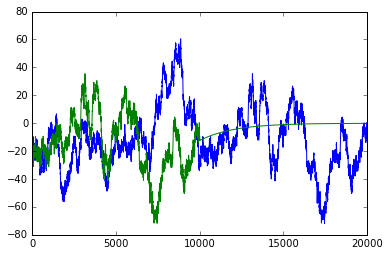

In [316]:
plt.plot(np.fft.irfft(np.fft.rfft(w)*np.fft.rfft(y)))
plt.plot(z)

In [317]:
np.fft.irfft(np.fft.rfft(w)*np.fft.rfft(y)).var()

478.8693923960563

In [318]:
np.fft.irfft(abs(np.fft.rfft(w))*abs(np.fft.rfft(y))).var()

478.86939239605658

In [319]:
np.mean(w)

-0.0057507410028930514

In [320]:
np.fft.rfft(w)[0]/len(w)

(-0.0057507410028930549+0j)

In [321]:
w_psd = (abs(np.fft.rfft(w)[1:]))**2
y_psd = (abs(np.fft.rfft(y)[1:]))**2
2.*np.sum(w_psd/len(w) * y_psd/len(y))

478.86939240258653

In [325]:
2.*np.sum(w_psd/len(w)**2)

0.99343965431016845

In [323]:
np.var(w)

0.99343962820010678

In [275]:
2.*np.sum(y_psd)

0.040037923596503926

In [276]:
np.var(y)

0.040037921094230038

In [233]:
w = np.random.randn(10000,)
y = np.exp(-np.linspace(0,10,100))
z = np.convolve(w,y, 'valid')
np.var(z)

5.5040949254709055

In [234]:
w_rfft = np.fft.rfft(w)
y_rfft = np.fft.rfft(y)
y_rfft_interp = interp1d(np.linspace(0, len(y_rfft), len(y_rfft)), y_rfft, kind='slinear', bounds_error=False,
                        fill_value=[0])
y_rfft_interpolated = y_rfft_interp(np.linspace(0, len(w_rfft), len(w_rfft)))

In [235]:
z_irfft = np.fft.irfft(w_rfft*y_rfft_interpolated)
np.var(z_irfft)

0.05059702431595603

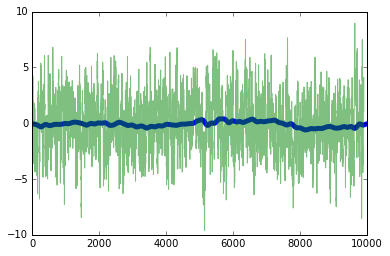

In [238]:
plt.plot(z_irfft, linewidth=5)
plt.plot(z, alpha=0.5)

#### what about linear extrapolating?

In [239]:
w_rfft = np.fft.rfft(w)
y_rfft = np.fft.rfft(y)
y_rfft_interp = interp1d(np.linspace(0, len(y_rfft), len(y_rfft)), y_rfft, kind='linear', bounds_error=False,
                        fill_value='extrapolate')
y_rfft_interpolated = y_rfft_interp(np.linspace(0, len(w_rfft), len(w_rfft)))

In [240]:
z_irfft = np.fft.irfft(w_rfft*y_rfft_interpolated)
np.var(z_irfft)

1862.3558352230459

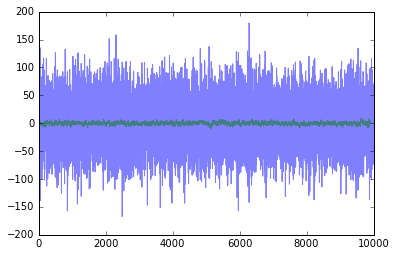

In [243]:
plt.plot(z_irfft, linewidth=1, alpha=0.5)
plt.plot(z, alpha=0.5)

# Seems like we're double-counting length of the arrays that go into a convolution. Verify for 2 different length arrays

In [463]:
w = np.random.randn(10000,)
y = np.exp(-np.linspace(0,10,100))
z_same = np.convolve(w, y, 'same')
z_valid = np.convolve(w, y, 'valid')
z_full = np.convolve(w, y, 'full')

In [464]:
np.var(z_same)

5.0682344570543272

In [465]:
np.var(z_valid)

5.0944666441529485

In [466]:
np.var(z_full)

5.0259643582802678

In [467]:
w_psd = abs(np.fft.rfft(w)[1:])**2
y_psd = abs(np.fft.rfft(y)[1:])**2
2*np.sum(w_psd/len(w) * y_psd/len(y))

ValueError: operands could not be broadcast together with shapes (5000,) (50,) 

Interpolate filling in missing values with zero

In [468]:
w_freqs = np.linspace(0, 0.5, len(w_psd))
y_freqs = np.linspace(0, 0.5, len(y_psd))

y_rfft_interp_slinear = interp1d(y_freqs, y_psd, kind='slinear', bounds_error=False, fill_value=[0])
y_rfft_interp_linear = interp1d(y_freqs, y_psd, kind='linear', bounds_error=False, fill_value='extrapolate')
y_rfft_interpolate_slinear = y_rfft_interp_slinear(w_freqs)
y_rfft_interpolate_linear = y_rfft_interp_linear(w_freqs)

In [469]:
2*np.sum(w_psd/len(w) * y_rfft_interpolate_slinear/len(y))

343.4395547006207

In [503]:
2*np.sum(w_psd/len(w) * y_rfft_interpolate_linear/len(y))

343.4395547006207

In [471]:
2*np.sum(w_psd/len(w) * y_rfft_interpolate_slinear/(2*len(y_rfft_interpolate_slinear)))

3.4343955470062069

In [472]:
2*np.sum(w_psd/len(w) * y_rfft_interpolate_slinear/(2*len(y_rfft_interpolate_slinear)))

3.4343955470062069

In [473]:
2*np.sum(w_psd/len(w) * y_rfft_interpolate_linear/(2*len(y_rfft_interpolate_linear)))

3.434395547006206

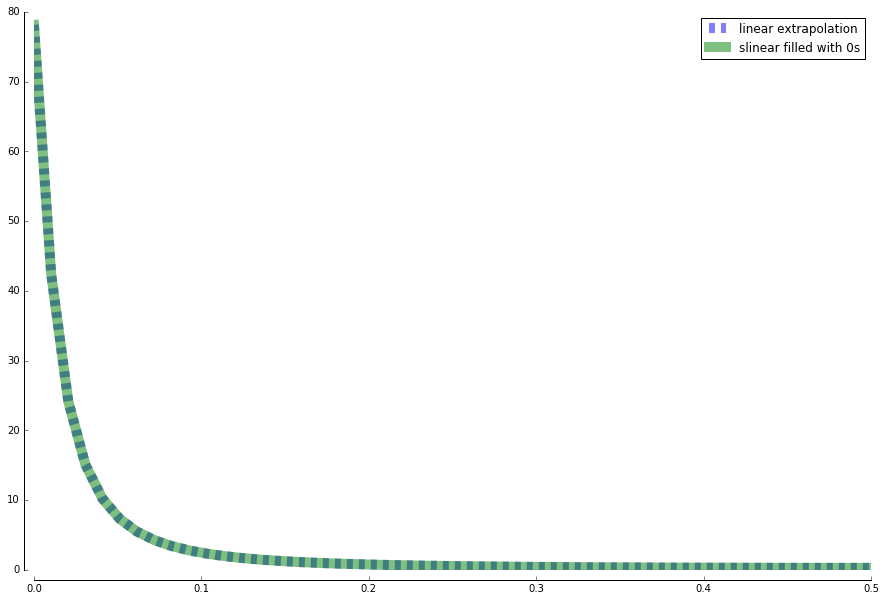

In [474]:
fig = plt.gcf()
fig.set_size_inches((15,10))
plt.plot(w_freqs, y_rfft_interpolate_linear, 'b--', linewidth=10, alpha=0.5, label='linear extrapolation')
plt.plot(w_freqs, y_rfft_interpolate_slinear, 'g', linewidth=10, alpha=0.5, label='slinear filled with 0s')
plt.legend()
adjust_spines(plt.gca())

In [475]:
2*np.sum(w_psd[:len(y_psd)]/len(w) * y_psd/len(y))

4.4776052308435439

In [476]:
2*np.sum(w_psd[len(y_psd):]/len(w))

9729.952910637001

In [477]:
2*np.sum(w_psd[:len(y_psd)]/len(y) * y_psd/len(y))

447.76052308435436

In [478]:
len(w)-len(y)

9900

In [479]:
len(z_valid)

9901

In [480]:
N = len(z_valid) // 2
2*np.sum(w_psd[:len(y_psd)]/N * y_psd/N)

0.18274075016196484

In [481]:
2*np.sum(w_psd[:len(y_psd)]/len(w) * y_psd/len(y))

4.4776052308435439

In [482]:
np.sum(w_psd[:len(y_psd)]/len(w))

43.198468869347508

In [483]:
np.sum(y_psd/len(y))

2.1931598405156136

In [484]:
2*np.sum((w_psd[:len(y_psd)]/len(y))**2 * (y_psd/len(y))**2)

32925.127780269257

In [485]:
2*np.sum(w_psd/len(w)**2)

0.98163498483756961

In [486]:
np.var(w)

0.9816347411358689

In [487]:
2*np.sum(y_psd/len(y)**2)

0.043863196810312269

In [488]:
np.var(y)

0.04383561230615262

In [489]:
len(w)

10000

In [490]:
len(y)

100

In [491]:
len(w[::int(len(w)/len(y))])

100

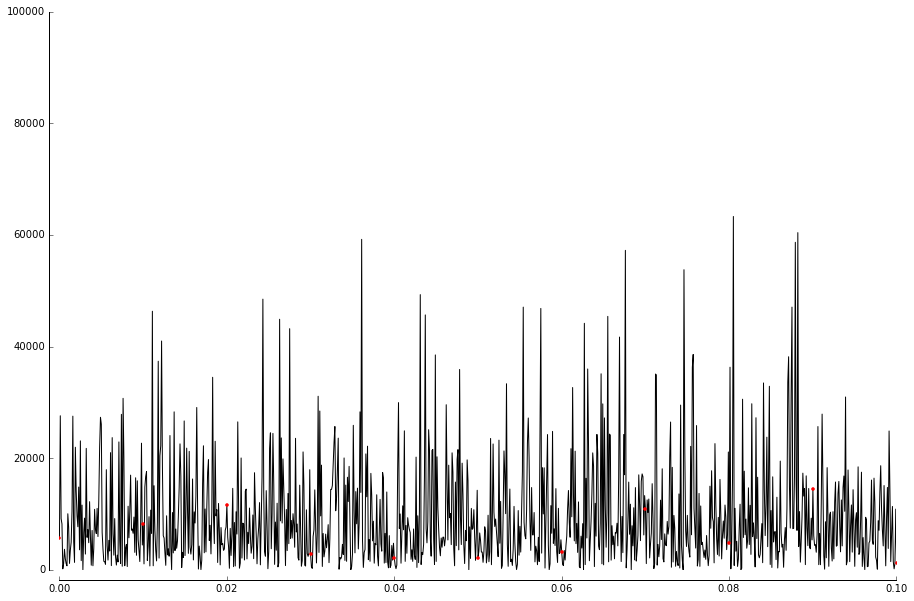

In [492]:
fig = plt.gcf()
fig.set_size_inches((15,10))

plt.plot(w_freqs, w_psd, 'k')
plt.plot(w_freqs[::int(len(w)/len(y))], w_psd[::int(len(w)/len(y))], 'r.')
plt.xlim([0,0.1])
adjust_spines(plt.gca())

In [493]:
2*np.sum(w_psd[::int(len(w)/len(y))]/len(w) * y_psd/len(y))

3.1578959941848215

In [494]:
2*np.sum(w_psd/len(w) * y_rfft_interpolate_slinear/len(y))

343.4395547006207

In [495]:
bloop = w_psd/len(w) * y_rfft_interpolate_slinear/len(y)
2*np.sum(bloop[::int(len(w)/len(y))])

3.2200867243006073

In [509]:
2*np.sum(w_psd/len(w) * y_rfft_interpolate_linear/(len(y_rfft_interpolate_linear)))

6.8687910940124119

In [523]:
len(y)

100

In [522]:
2*np.sum(abs(np.fft.rfft(w)[::int(len(w)/len(y))])*abs(np.fft.rfft(y)))/(len(y))

134.54950461038331

In [520]:
2*np.sum(abs(np.fft.rfft(w)[::int(len(w)/len(y))])*abs(np.fft.rfft(y)))/(len(y)*len(y))

1.3454950461038333

# Starting over

In [545]:
x = np.random.randn(10000)
y = np.exp(-np.linspace(0,10,10000))
z = np.convolve(x, y, mode='full')

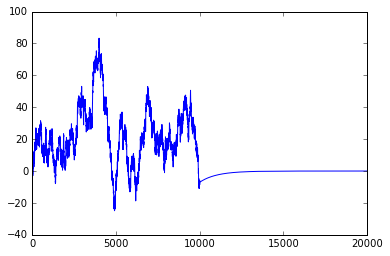

In [546]:
plt.plot(z)

In [547]:
np.var(z)

299.88845803142488

In [548]:
z_amp = np.abs(np.fft.rfft(z)[1:])/len(z)
z_psd = z_amp**2
2*np.sum(z_psd)

299.88845803152185

In [553]:
x_amp = np.abs(np.fft.rfft(x))
y_amp = np.abs(np.fft.rfft(y))
x_pwr = x_amp**2
y_pwr = y_amp**2

In [565]:
N = len(z_hat)
2*np.sum(x_pwr[1:]*y_pwr[1:])/(N**2)

343.33955392007891

In [558]:
z_hat = np.fft.ifft(np.fft.fft(x)*np.fft.fft(y))

In [ ]:
plt.plot(z_hat)

In [559]:
np.var(z_hat)

343.33954960614233

In [563]:
np.var(z[:len(x)])

332.67032027492644

/Users/lmcintosh/Library/Python/3.5/lib/python/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


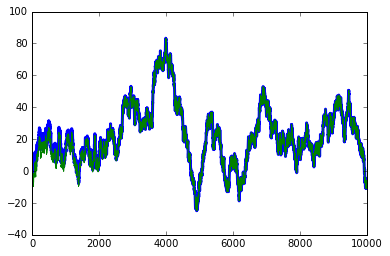

In [562]:
plt.plot(z[:len(x)], linewidth=3)
plt.plot(z_hat)

## fft's are doing mode='full'

## Test

In [596]:
x = np.random.randn(100000)
y = np.exp(-np.linspace(0,10,100))
z = np.convolve(x, y, mode='full')

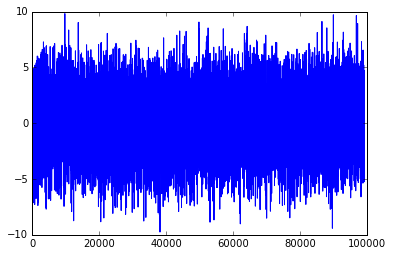

In [597]:
plt.plot(z[:-1000])

In [598]:
np.var(z[:-1000])

5.4552149104602812

In [599]:
np.var(z)

5.4415985802824132

In [641]:
x_amp = abs(np.fft.rfft(x)) #[1::len(x)/len(y)]*(len(y)/len(x))
y_amp = abs(np.fft.rfft(y))
z_var = 2*np.sum(x_amp[1::len(x)/len(y)]**2 * y_amp[1:]**2)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [634]:
np.mean(x_amp)

0.2789679646283359

In [636]:
z_var/np.var(z)

4.7615326402789817

In [637]:
np.sqrt(z_var/np.var(z))

2.1820936369182196

In [639]:
x_trunc = x[:100]

In [642]:
x_trunc_amp = abs(np.fft.rfft(x_trunc))

In [643]:
np.mean(x_trunc_amp)

8.554971577777323

In [644]:
np.mean(x_amp)

280.41243402176883

In [647]:
np.mean(x_trunc_amp/len(x_trunc))

0.085549715777773247

In [648]:
np.mean(x_amp/len(x))

0.0028041243402176872

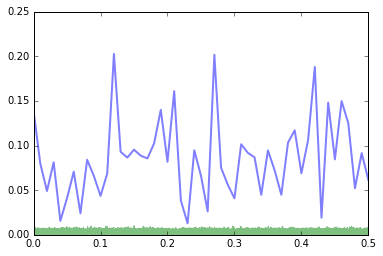

In [652]:
plt.plot(np.linspace(0,0.5,len(x_trunc_amp)), x_trunc_amp/len(x_trunc), linewidth=2, alpha=0.5)
plt.plot(np.linspace(0,0.5,len(x_amp)), x_amp/len(x), alpha=0.5)

In [653]:
np.mean(x_trunc)

-0.13897855983043272

In [654]:
np.mean(x)

0.0014302654124556898

In [655]:
x_trunc_amp[0]/len(x_trunc)

0.13897855983043272

In [656]:
x_amp[0]/len(x)

0.0014302654124556903

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


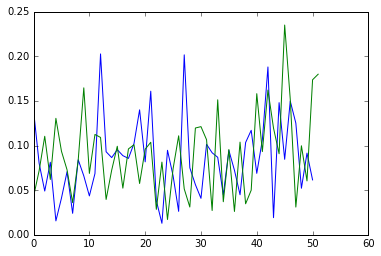

In [663]:
plt.plot(x_trunc_amp/len(x_trunc))
plt.plot(30*x_amp[::len(x_amp)/len(x_trunc_amp)]/len(x))

In [711]:
T = 10000
x = np.random.randn(T)
y = np.exp(-np.linspace(0, 10, T))
z = np.convolve(x, y, mode='full')

In [712]:
x_power = abs(np.fft.rfft(x))**2
y_power = abs(np.fft.rfft(y))**2
z_power = 2*sum(x_power*y_power)/T

In [713]:
np.var(z)

228.53413242532739

In [714]:
np.sum(z**2)

4863413.1854291521

In [715]:
z_power

5133897.3147122879

In [716]:
z_var = 2*sum(x_power[1:] * y_power[1:])/T**2

In [717]:
z_var

396.21196223063765

In [718]:
np.var(z)

228.53413242532739

In [719]:
np.mean(x)

-0.0076516235219900352

In [720]:
np.mean(abs(x))

0.79366169018982391

In [721]:
np.var(x)

0.99326718127654889

In [725]:
2*np.sum(x_power[1:])/T**2

0.99335241625325055

In [730]:
x_amp = abs(np.fft.rfft(x))
y_amp = abs(np.fft.rfft(y))

In [732]:
np.var(np.convolve(x,y,'full'))

228.53413242532739

In [735]:
2*np.sum((x_amp[1:]*y_amp[1:])**2)/T**2

396.2119622306368

## Does interpolation work?

In [745]:
x_trunc = x[:1000]
x_trunc_amp = abs(np.fft.rfft(x_trunc))
x_trunc_amp_interp = interp1d(np.linspace(0,0.5,len(x_trunc_amp)), x_trunc_amp, kind='slinear')
x_trunc_amp_interpolated = x_trunc_amp_interp(np.linspace(0,0.5,len(x_amp)))

In [746]:
2*np.sum((x_trunc_amp_interpolated[1:]*y_amp[1:])**2)/T**2

18.246190677274946

In [747]:
np.var(np.convolve(x_trunc, y, 'full'))

25.426663704225401

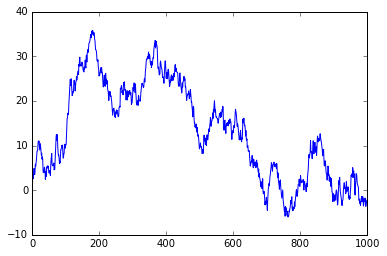

In [749]:
plt.plot(np.convolve(x_trunc, y, 'full')[:1000])

In [750]:
np.var(np.convolve(x_trunc, y, 'full')[:1000])

115.52416186082124

## No.